Here we study the behaviour of the system when the gain of the controller changes.  
The weather data used are the february ones.


# $Kp=10^3$ W/K


dt = 50 s


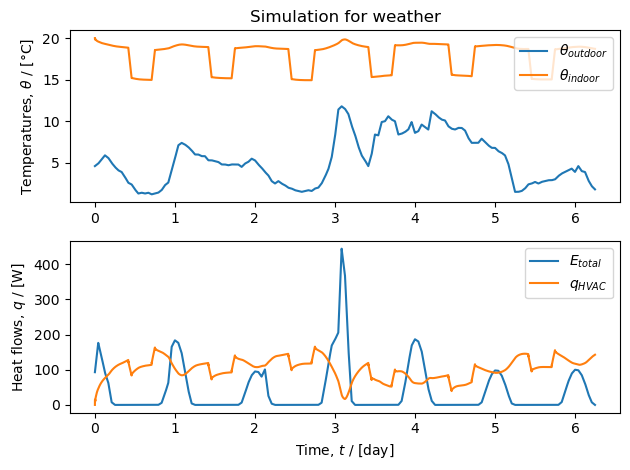

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem

controller = True
Kp = 1e3
explicit_Euler = True
imposed_time_step = False
Δt = 3600    # s, imposed time step   

# MODEL
# =====
# Thermal circuits
TC = dm4bem.file2TC('TC.csv', name='', auto_number=False)

# by default TC['G']['q11'] = 0 # Kp -> 0, no controller (free-floating
if controller:
    TC['G']['q11'] = Kp     # Kp -> ∞, almost perfect controller

# State-space
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As
dtmax = 2 * min(-1. / λ)    # max time step for Euler explicit stability
dt = dm4bem.round_time(dtmax)

if imposed_time_step:
    dt = Δt

dm4bem.print_rounded_time('dt', dt)

# INPUT DATA SET
# ==============
input_data_set = pd.read_csv('input_data_set.csv',
                             index_col=0,
                             parse_dates=True)
input_data_set
input_data_set = input_data_set.resample(
    str(dt) + 'S').interpolate(method='linear')
input_data_set.head()
# Input vector in time from input_data_set
u = dm4bem.inputs_in_time(us, input_data_set)
u.head()
# Initial conditions
θ0 = 20                     # °C, initial temperatures
θ = pd.DataFrame(index=u.index)
θ[As.columns] = θ0          # fill θ with initial valeus θ0
I = np.eye(As.shape[0])     # identity matrix

if explicit_Euler:
    for k in range(u.shape[0] - 1):
        θ.iloc[k + 1] = (I + dt * As) @ θ.iloc[k] + dt * Bs @ u.iloc[k]
else:
    for k in range(u.shape[0] - 1):
        θ.iloc[k + 1] = np.linalg.inv(
            I - dt * As) @ (θ.iloc[k] + dt * Bs @ u.iloc[k])
# outputs
y = (Cs @ θ.T + Ds @  u.T).T
Kp = TC['G']['q11']     # controller gain
S = 9                   # m², surface area of the toy house
q_HVAC = Kp * (u['q11'] - y['θ6']) / S  # W/m²
y['θ6']
data = pd.DataFrame({'To': input_data_set['To'],
                     'θi': y['θ6'],
                     'Etot': input_data_set['Etot'],
                     'q_HVAC': q_HVAC})

plt.show();
t = dt * np.arange(data.shape[0])   # time vector

fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t / 3600 / 24, data['To'], label='$θ_{outdoor}$')
axs[0].plot(t / 3600 / 24, y.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600 / 24, data['Etot'], label='$E_{total}$')
axs[1].plot(t / 3600 / 24, q_HVAC, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()


# $Kp=10^4$ W/K

dt = 6 s


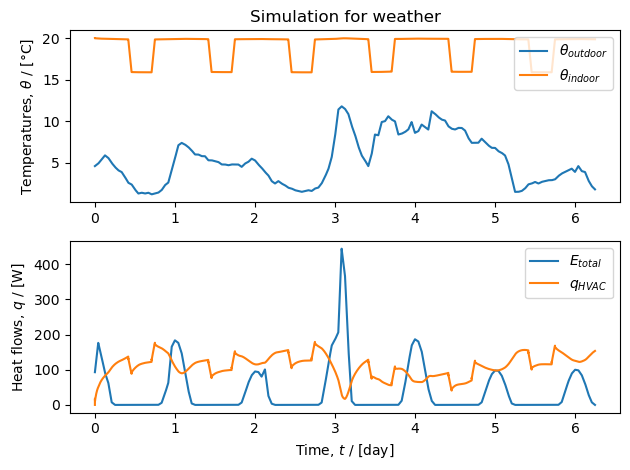

In [2]:
Kp = 1e4
explicit_Euler = True
imposed_time_step = False
Δt = 3600    # s, imposed time step   

# MODEL
# =====
# Thermal circuits
TC = dm4bem.file2TC('TC.csv', name='', auto_number=False)

# by default TC['G']['q11'] = 0 # Kp -> 0, no controller (free-floating
if controller:
    TC['G']['q11'] = Kp     # Kp -> ∞, almost perfect controller

# State-space
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

λ1 = np.linalg.eig(As)[0]    # eigenvalues of matrix As
dtmax1 = 2 * min(-1. / λ1)    # max time step for Euler explicit stability
dt1 = dm4bem.round_time(dtmax1)

if imposed_time_step:
    dt1 = Δt

dm4bem.print_rounded_time('dt', dt1)

# INPUT DATA SET
# ==============
input_data_set = pd.read_csv('input_data_set.csv',
                             index_col=0,
                             parse_dates=True)
input_data_set
input_data_set = input_data_set.resample(
    str(dt1) + 'S').interpolate(method='linear')
input_data_set.head()
# Input vector in time from input_data_set
u = dm4bem.inputs_in_time(us, input_data_set)
u.head()
# Initial conditions
θ0 = 20                     # °C, initial temperatures
θ1 = pd.DataFrame(index=u.index)
θ1[As.columns] = θ0          # fill θ with initial valeus θ0
I = np.eye(As.shape[0])     # identity matrix

if explicit_Euler:
    for k in range(u.shape[0] - 1):
        θ1.iloc[k + 1] = (I + dt1 * As) @ θ1.iloc[k] + dt1 * Bs @ u.iloc[k]
else:
    for k in range(u.shape[0] - 1):
        θ1.iloc[k + 1] = np.linalg.inv(
            I - dt1 * As) @ (θ1.iloc[k] + dt1 * Bs @ u.iloc[k])
# outputs
y1 = (Cs @ θ1.T + Ds @  u.T).T
Kp = TC['G']['q11']     # controller gain
S = 9                   # m², surface area of the toy house
q_HVAC1 = Kp * (u['q11'] - y1['θ6']) / S  # W/m²
y1['θ6']
data1 = pd.DataFrame({'To': input_data_set['To'],
                     'θi': y1['θ6'],
                     'Etot': input_data_set['Etot'],
                     'q_HVAC': q_HVAC1})

plt.show();
t1 = dt1 * np.arange(data1.shape[0])   # time vector

fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t1 / 3600 / 24, data1['To'], label='$θ_{outdoor}$')
axs[0].plot(t1 / 3600 / 24, y1.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t1 / 3600 / 24, data1['Etot'], label='$E_{total}$')
axs[1].plot(t1 / 3600 / 24, q_HVAC1, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

# $Kp=10^2$ W/K

dt = 240 s = 4.0 min


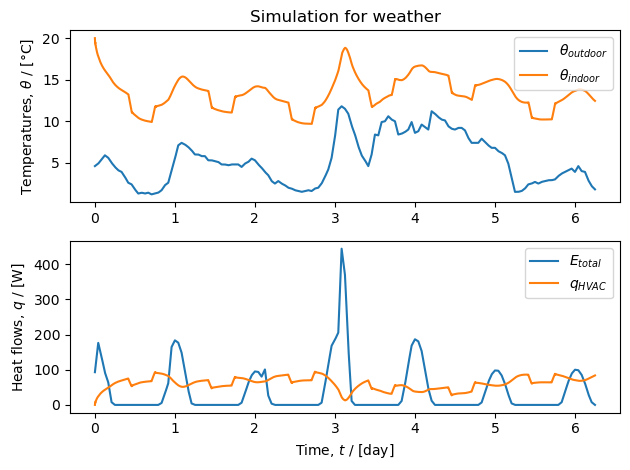

In [3]:
Kp = 1e2
explicit_Euler = True
imposed_time_step = False
Δt = 3600    # s, imposed time step   

# MODEL
# =====
# Thermal circuits
TC = dm4bem.file2TC('TC.csv', name='', auto_number=False)

# by default TC['G']['q11'] = 0 # Kp -> 0, no controller (free-floating
if controller:
    TC['G']['q11'] = Kp     # Kp -> ∞, almost perfect controller

# State-space
[As, Bs, Cs, Ds, us] = dm4bem.tc2ss(TC)

λ2 = np.linalg.eig(As)[0]    # eigenvalues of matrix As
dtmax2 = 2 * min(-1. / λ2)    # max time step for Euler explicit stability
dt2 = dm4bem.round_time(dtmax2)

if imposed_time_step:
    dt2 = Δt

dm4bem.print_rounded_time('dt', dt2)

# INPUT DATA SET
# ==============
input_data_set = pd.read_csv('input_data_set.csv',
                             index_col=0,
                             parse_dates=True)
input_data_set
input_data_set = input_data_set.resample(
    str(dt2) + 'S').interpolate(method='linear')
input_data_set.head()
# Input vector in time from input_data_set
u = dm4bem.inputs_in_time(us, input_data_set)
u.head()
# Initial conditions
θ0 = 20                     # °C, initial temperatures
θ2 = pd.DataFrame(index=u.index)
θ2[As.columns] = θ0          # fill θ with initial valeus θ0
I = np.eye(As.shape[0])     # identity matrix

if explicit_Euler:
    for k in range(u.shape[0] - 1):
        θ2.iloc[k + 1] = (I + dt2 * As) @ θ2.iloc[k] + dt2 * Bs @ u.iloc[k]
else:
    for k in range(u.shape[0] - 1):
        θ2.iloc[k + 1] = np.linalg.inv(
            I - dt2 * As) @ (θ2.iloc[k] + dt2 * Bs @ u.iloc[k])
# outputs
y2 = (Cs @ θ2.T + Ds @  u.T).T
Kp = TC['G']['q11']     # controller gain
S = 9                   # m², surface area of the toy house
q_HVAC2 = Kp * (u['q11'] - y2['θ6']) / S  # W/m²
y2['θ6']
data2 = pd.DataFrame({'To': input_data_set['To'],
                     'θi': y2['θ6'],
                     'Etot': input_data_set['Etot'],
                     'q_HVAC': q_HVAC2})

plt.show();
t2 = dt2 * np.arange(data2.shape[0])   # time vector

fig, axs = plt.subplots(2, 1)
# plot outdoor and indoor temperature
axs[0].plot(t2 / 3600 / 24, data2['To'], label='$θ_{outdoor}$')
axs[0].plot(t2 / 3600 / 24, y2.values, label='$θ_{indoor}$')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t2 / 3600 / 24, data2['Etot'], label='$E_{total}$')
axs[1].plot(t2 / 3600 / 24, q_HVAC2, label='$q_{HVAC}$')
axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

# Comparaison of indoor temperatures and thermal loads

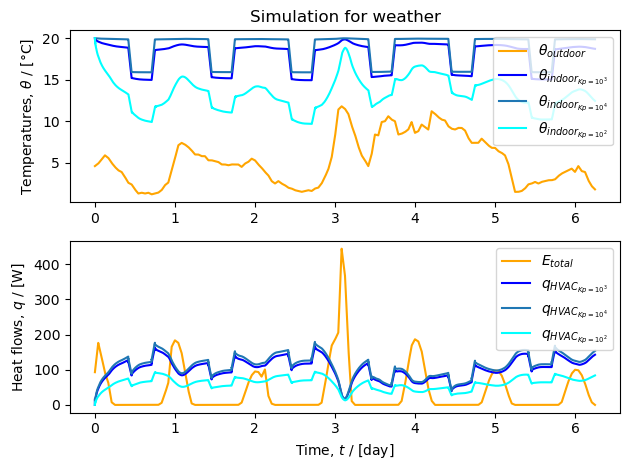

In [4]:
fig, axs = plt.subplots(2, 1)
# plot outdoor temperature
axs[0].plot(t / 3600 / 24, data['To'], label='$θ_{outdoor}$',color='orange')
# plot the indoor temperature with Kp=10^3 W/K
axs[0].plot(t / 3600 / 24, y.values, label='$θ_{indoor_{Kp=10^3}}$',color='blue')
# plot the indoor temperature with Kp=10^4 W/K
axs[0].plot(t1 / 3600 / 24, y1.values, label='$θ_{indoor_{Kp=10^4}}$')
# plot the indoor temperature with Kp=10^2 W/K
axs[0].plot(t2 / 3600 / 24, y2.values, label='$θ_{indoor_{Kp=10^2}}$',color='cyan')
axs[0].set(ylabel='Temperatures, $θ$ / [°C]',
           title='Simulation for weather')
axs[0].legend(loc='upper right')

# plot total solar radiation and HVAC heat flow
axs[1].plot(t / 3600 / 24, data['Etot'], label='$E_{total}$',color='orange')
#Kp=10^3 W/K
axs[1].plot(t / 3600 / 24, q_HVAC, label='$q_{HVAC_{Kp=10^3}}$',color='blue')
#Kp=10^4 W/K
axs[1].plot(t1 / 3600 / 24, q_HVAC1, label='$q_{HVAC_{Kp=10^4}}$')
#Kp=10^2 W/K
axs[1].plot(t2 / 3600 / 24, q_HVAC2, label='$q_{HVAC_{Kp=10^2}}$',color='cyan')

axs[1].set(xlabel='Time, $t$ / [day]',
           ylabel='Heat flows, $q$ / [W]')
axs[1].legend(loc='upper right')

fig.tight_layout()

Analyse :

As we know, the value of the controller's gain has a major effect on the temperature inside a building. The larger Kp is and the closer it is to infinity, the closer the indoor temperature will be to the desired comfort values. Conversely, the smaller Kp is and the closer it is to zero, the less effective the temperature controller will be and the indoor temperature will follow the fluctuations of the outdoor temperature. However, with a high Kp, the calculation time will be longer, which can be a disadvantage.
    

# Time steps

In [5]:
Mod1={'dt (s)':dt}
Mod2={'dt (s)':dt1}
Mod3={'dt (s)':dt2}
pd.DataFrame.from_dict({'$Kp=10^3$ W/K ':Mod1,'$Kp=10^4$ W/K':Mod2,'$Kp=10^2$ W/K':Mod3},orient='index')

,dt (s)
$Kp=10^2$ W/K,240.0
$Kp=10^3$ W/K,50.0
$Kp=10^4$ W/K,6.0


Analyse : 

As the controller gain increases, it gets closer and closer to a perfect controller. In this case, the time step must be small for the calculations to run smoothly. 